<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


<Axes: xlabel='DATE'>

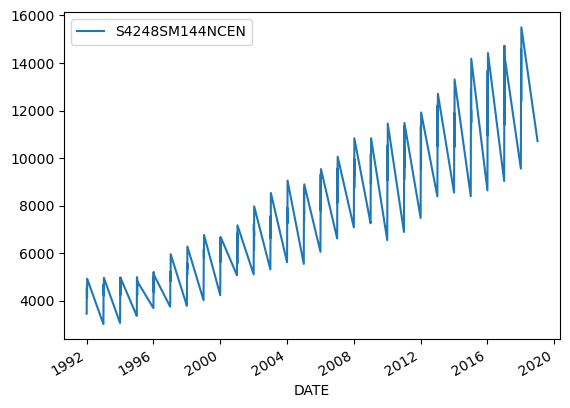

In [1]:
import pandas as pd
df = pd.read_csv('Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.info()
df.plot()

<Axes: xlabel='DATE'>

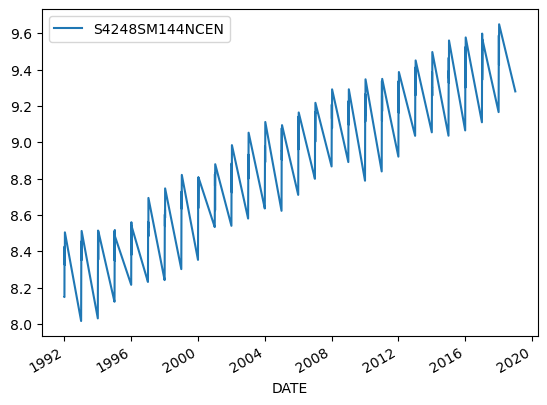

In [2]:
import numpy as np
df1 = np.log(df)
df1.plot()

In [3]:
msk = (df1.index < df1.index[-30])
df1_train = df1[msk].copy()
df1_test = df1[~msk].copy()

# checking stationarity

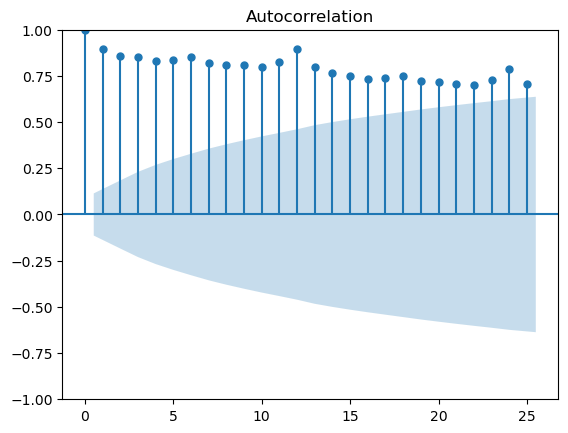

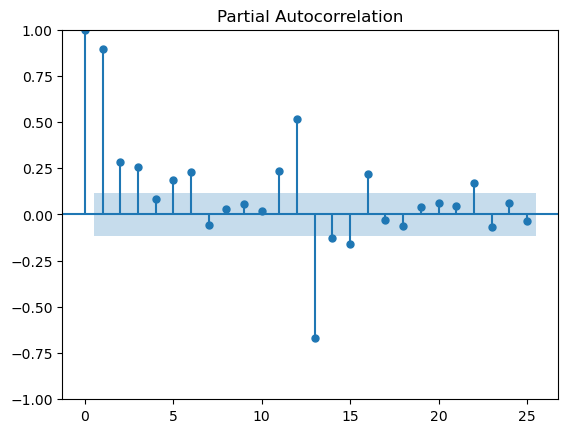

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_original = plot_acf(df1_train)
pacf_original = plot_pacf(df1_train)

In [5]:
#checking stationarity with adf test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df1_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.7593657671160883


# making this dataset stationary

<Axes: xlabel='DATE'>

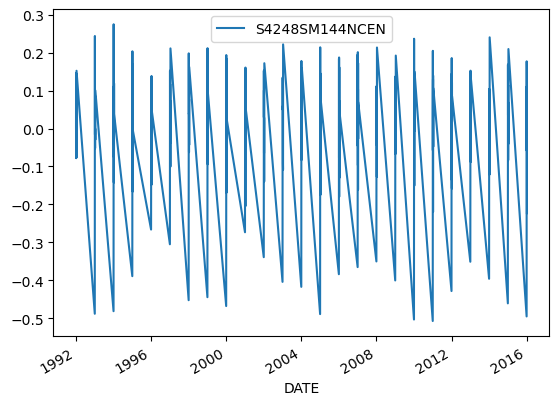

In [6]:
df1_train_diff = df1_train.diff().dropna()
df1_train_diff.plot()

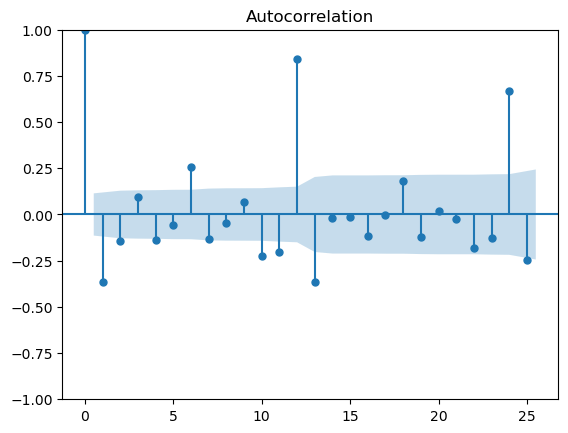

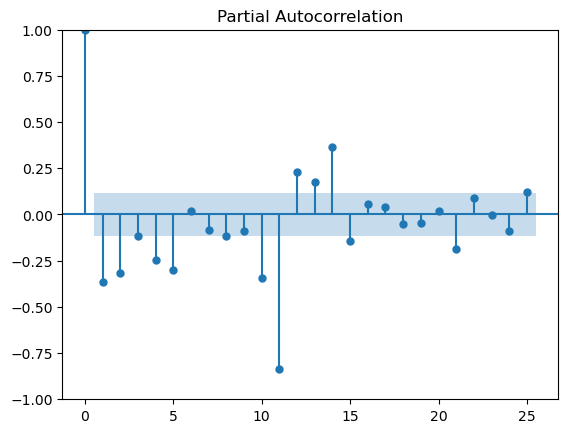

In [7]:
acf_diff = plot_acf(df1_train_diff)
pacf_diff = plot_pacf(df1_train_diff)

In [8]:
adf_test = adfuller(df1_train_diff)
print(f'p_values:{adf_test[1]}')

p_values:4.82701209525453e-06


In [9]:
#hence d=1

In [10]:
!pip install pmdarima

In [11]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
stepwise_fit = auto_arima(df1_train)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  295
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 204.649
Date:                Sun, 26 Jan 2025   AIC                           -401.298
Time:                        04:17:26   BIC                           -386.563
Sample:                             0   HQIC                          -395.397
                                - 295                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0038      0.000     10.757      0.000       0.003       0.005
ma.L1         -0.7867      0.052    -15.067      0.000      -0.889      -0.684
ma.L2         -0.1790      0.053     -3.370      0.001      -0.283      -0.075
sigma2         0.0144      0.001     11.246      0.000       0.012       0.017
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                81.17
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -1.12
Prob(H) (two-sided):                  0.90   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
import pmdarima as pm
auto_arima = pm.auto_arima(df1_train, stepwise=False, seasonal=False)
auto_arima

auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  295
Model:               SARIMAX(0, 1, 5)   Log Likelihood                 219.414
Date:                Sun, 26 Jan 2025   AIC                           -424.828
Time:                        04:53:38   BIC                           -399.043
Sample:                             0   HQIC                          -414.502
                                - 295                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0037      0.001      4.979      0.000       0.002       0.005
ma.L1         -0.9620      0.049    -19.787      0.000      -1.057      -0.867
ma.L2         -0.1683      0.086     -1.950      0.051      -0.337       0.001
ma.L3         -0.0559      0.126     -0.443      0.658      -0.304       0.192
ma.L4         -0.0381      0.125     -0.305      0.761      -0.283       0.207
ma.L5          0.3095      0.082      3.767      0.000       0.148       0.470
sigma2         0.0130      0.001     11.331      0.000       0.011       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                17.74
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.56
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
import statsmodels.api as st
from statsmodels.tsa.arima.model import ARIMA
model = st.tsa.ARIMA(df1_train, order=(0,1,5))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         S4248SM144NCEN   No. Observations:                  295
Model:                 ARIMA(0, 1, 5)   Log Likelihood                 208.523
Date:                Sun, 26 Jan 2025   AIC                           -405.047
Time:                        04:51:26   BIC                           -382.945
Sample:                             0   HQIC                          -396.196
                                - 295                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9080      0.054    -16.661      0.000      -1.015      -0.801
ma.L2         -0.1603      0.095     -1.693      0.090      -0.346       0.025
ma.L3         -0.0931      0.112     -0.829      0.4

# making predictions

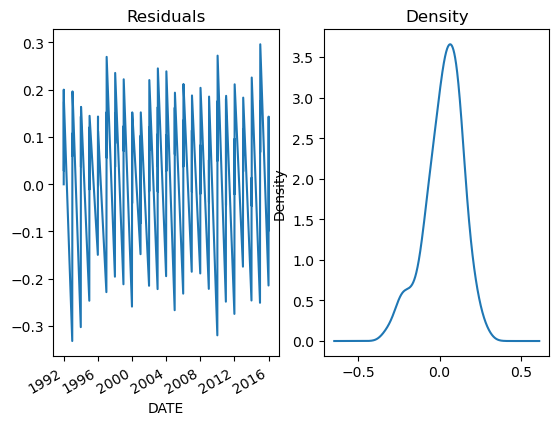

In [24]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig,ax = plt.subplots(1,2)
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

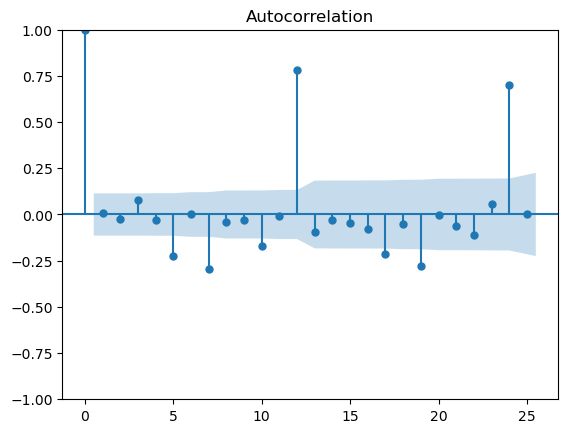

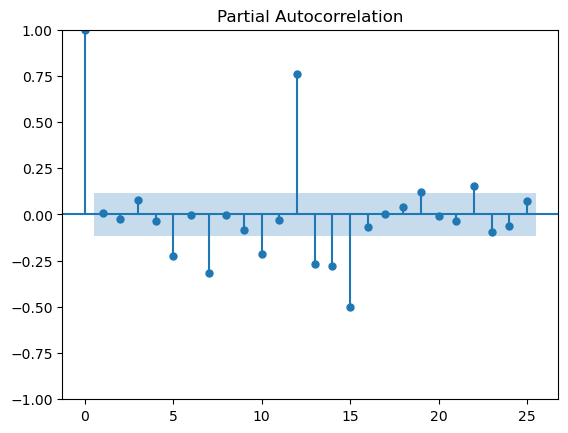

In [25]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: xlabel='DATE'>

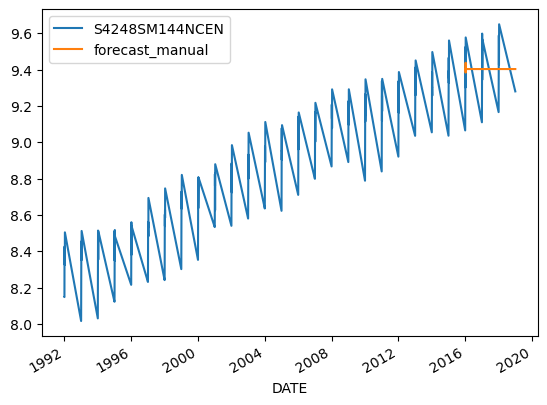

In [26]:
forecast_test = model_fit.forecast(len(df1_test))
df1['forecast_manual'] = [None]*len(df1_train)+list(forecast_test)
df1.plot()

# making predictions on test dataset

In [30]:
start = len(df1_train)
end = len(df1_train)+len(df1_test)-1

pred = model_fit.predict(start=start , end=end , typ='levels')
pred.index=df1.index[start:end+1]
print(pred)

DATE
2016-01-08    9.402643
2016-01-09    9.397972
2016-01-10    9.383118
2016-01-11    9.437278
2016-01-12    9.402629
2017-01-01    9.402629
2017-01-02    9.402629
2017-01-03    9.402629
2017-01-04    9.402629
2017-01-05    9.402629
2017-01-06    9.402629
2017-01-07    9.402629
2017-01-08    9.402629
2017-01-09    9.402629
2017-01-10    9.402629
2017-01-11    9.402629
2017-01-12    9.402629
2018-01-01    9.402629
2018-01-02    9.402629
2018-01-03    9.402629
2018-01-04    9.402629
2018-01-05    9.402629
2018-01-06    9.402629
2018-01-07    9.402629
2018-01-08    9.402629
2018-01-09    9.402629
2018-01-10    9.402629
2018-01-11    9.402629
2018-01-12    9.402629
2019-01-01    9.402629
Name: predicted_mean, dtype: float64


<Axes: xlabel='DATE'>

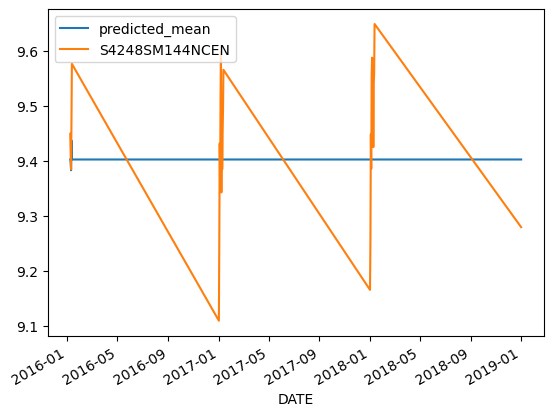

In [31]:
pred.plot(legend=True)
df1_test['S4248SM144NCEN'].plot(legend=True)

In [32]:
df1_test['S4248SM144NCEN'].mean()

9.438456726126628

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,df1_test['S4248SM144NCEN']))
print(rmse)

0.13342093493747506


In [34]:
model2 = ARIMA(df1['S4248SM144NCEN'],order=(4,1,4))
model2=model2.fit()
df1.tail

<bound method NDFrame.tail of             S4248SM144NCEN  forecast_manual
DATE                                       
1992-01-01        8.148735              NaN
1992-01-02        8.148446              NaN
1992-01-03        8.294550              NaN
1992-01-04        8.425955              NaN
1992-01-05        8.347827              NaN
...                    ...              ...
2018-01-09        9.425129         9.402629
2018-01-10        9.540651         9.402629
2018-01-11        9.559165         9.402629
2018-01-12        9.648853         9.402629
2019-01-01        9.279680         9.402629

[325 rows x 2 columns]>

In [35]:
#for future dates

index_future_dates=pd.date_range(start='2019-01-01', end='2019-01-31', freq='D')
print(index_future_dates)
pred=model2.predict(start=len(df1),end=len(df1)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31'],
              dtype='datetime64[ns]', freq='D')
2019-01-01    9.385647
2019-01-02    9.419203
2019-01-03    9.507502
2019-01-04    9.567173
2019-01-05    9.532699
2019-01-06    9.521483
2019-01-07    9.542134
2019-01-08    9.518610
2019-01-09    9.498389
2019-01-10    9.517569
2019-01-11    9.518525
2019-01-12    9.503382
2019-01-13    9.513145
2019-01-14    9.521468
2019-01-15    9.510693
2019-01-16    9.511025
2019-01-17    9.519321
2019-0

<Axes: >

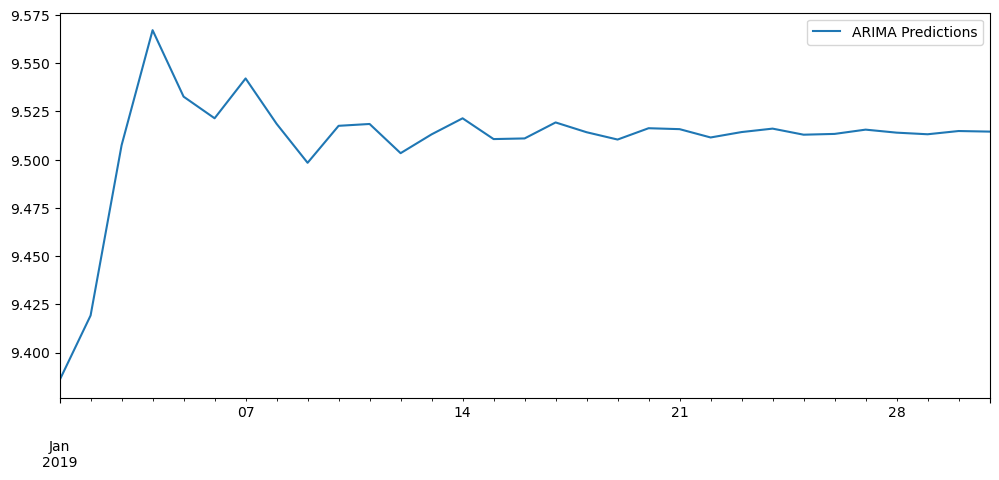

In [36]:
pred.plot(figsize=(12,5),legend=True)